## Data Preprocessing

It is important to prepare the dataset for machine learning. For this project, the necessary preprocessing steps include:
- Handling missing values
- Encoding categorical variables
- Splitting data into training and test sets

Standardizing is only required in some models and will be done during model training selectively.

In [145]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv("../data/heart_disease.csv")

# Change to consistent column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,age,gender,blood_pressure,cholesterol_level,exercise_habits,smoking,family_heart_disease,diabetes,bmi,high_blood_pressure,...,high_ldl_cholesterol,alcohol_consumption,stress_level,sleep_hours,sugar_consumption,triglyceride_level,fasting_blood_sugar,crp_level,homocysteine_level,heart_disease_status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


Also, we need to make sure that the features are the right type. Converting "object" variables to "category" data type will clearly tell the model that it's categorical, not just random text (object). Also, "category" uses less memory than "object", and operations like filtering or encoding run faster.

In [ ]:
# Convert object columns to category
for column in df.select_dtypes(include = "object").columns:
    df[column] = df[column].astype("category")

print(df.dtypes)

age                      float64
gender                  category
blood_pressure           float64
cholesterol_level        float64
exercise_habits         category
smoking                 category
family_heart_disease    category
diabetes                category
bmi                      float64
high_blood_pressure     category
low_hdl_cholesterol     category
high_ldl_cholesterol    category
alcohol_consumption     category
stress_level            category
sleep_hours              float64
sugar_consumption       category
triglyceride_level       float64
fasting_blood_sugar      float64
crp_level                float64
homocysteine_level       float64
heart_disease_status    category
dtype: object


**1. Handling Missing Values**

Missing values can make models bias, which will reduce its overall accuracy. For missing values in numerical columns, we can impute a median value as it's not affected by outliers. For categorical data type features, imputing the empty cells with the most frequent value keeps the data consistent.

From the EDA, since most columns have 30 or less missing values, these changes would not affect the model extremely. alcohol_consumption has over 2,000 missing values, which is a large portion of the dataset. Keeping it would require complex imputation so removing it would be a simple way to clean the data. Alcohol's affects on heart disease is also determined by many other factors like the type of alcohol, so no key predictor was removed.

In [ ]:
# Remove "Alcohol Consumption" column
new_df = df.drop(columns = ["alcohol_consumption"])

# Put median value into missing values for NUMERICAL columns
num_cols = new_df.select_dtypes(include = "float64").columns
for column in num_cols:
    if new_df[column].isnull().sum() > 0:
        new_df[column] = new_df[column].fillna(new_df[column].median())

# Put mode value into categorical type columns
cat_cols = new_df.select_dtypes(include = "category").columns
for column in cat_cols:
    if new_df[column].isnull().sum() > 0:
        new_df[column] = new_df[column].fillna(new_df[column].mode()[0])

print(f"Table dimensions: {new_df.shape}")
print(f"Missing values per column:\n{new_df.isnull().sum()}")

Table dimensions: (10000, 20)
Missing values per column:
age                     0
gender                  0
blood_pressure          0
cholesterol_level       0
exercise_habits         0
smoking                 0
family_heart_disease    0
diabetes                0
bmi                     0
high_blood_pressure     0
low_hdl_cholesterol     0
high_ldl_cholesterol    0
stress_level            0
sleep_hours             0
sugar_consumption       0
triglyceride_level      0
fasting_blood_sugar     0
crp_level               0
homocysteine_level      0
heart_disease_status    0
dtype: int64


**2. Encoding Categorical Variables**

Converting all categorical variables into numerical format is essential for machine learning models.

- **Binary encoding**: Yes/No -> 1/0
- **Ordinal encoding**: for features with an order (ex. Low < Medium < High)
- **One-hot encoding**: for nominal variables (ex. for Gender)

Target variable, heart_disease_status does not need to be encoded. However, changing its values, "Yes" and "No" to "Present" and "Absent" respectively will be a better word choice.

In [ ]:
# Binary encoding
binary_map = {"Yes": 1, "No": 0}
binary_cols = ["smoking", "family_heart_disease", "diabetes", "high_blood_pressure", "low_hdl_cholesterol", "high_ldl_cholesterol"]
for column in binary_cols:
    new_df[column] = new_df[column].map(binary_map)

# Ordinal encoding
ordinal_map = {"Low": 0, "Medium": 1, "High": 2}
ordinal_cols = ["exercise_habits", "stress_level", "sugar_consumption"]
for column in ordinal_cols:
    new_df[column] = new_df[column].map(ordinal_map)

# One-hot encoding
new_df = pd.get_dummies(new_df, columns = ["gender"], drop_first = True)
new_df["gender_Male"] = new_df["gender_Male"].astype(int) # 1 means "is male" and 0 means "is female"
new_df.columns = new_df.columns.str.lower() # to get "gender_male" for name

# Renaming heart_disease_status values to "Present" and "Absent"
new_df["heart_disease_status"] = new_df["heart_disease_status"].replace({"Yes": "Present", "No": "Absent"})

new_df.head(3)

C:\Users\marku\AppData\Local\Temp\ipykernel_4340\43235091.py:19: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  new_df["heart_disease_status"] = new_df["heart_disease_status"].replace({"Yes": "Present", "No": "Absent"})


,age,blood_pressure,cholesterol_level,exercise_habits,smoking,family_heart_disease,diabetes,bmi,high_blood_pressure,low_hdl_cholesterol,high_ldl_cholesterol,stress_level,sleep_hours,sugar_consumption,triglyceride_level,fasting_blood_sugar,crp_level,homocysteine_level,heart_disease_status,gender_male
0,56.0,153.0,155.0,2,1,1,0,24.991591,1,1,0,1,7.633228,1,342.0,120.0,12.969246,12.387250,Absent,1
1,69.0,146.0,286.0,2,0,1,1,25.221799,0,1,0,2,8.744034,1,133.0,157.0,9.355389,19.298875,Absent,0
2,46.0,126.0,216.0,0,0,0,0,29.855447,0,1,1,0,4.440440,0,393.0,92.0,12.709873,11.230926,Absent,1


**3. Splitting into Training and Testing sets**

The dataset will split into a training set (80%) and a test set (20%). The model will be trained on the training data and evaluated on unseen test data.

In [ ]:
# Separate features and target
x = new_df.drop(columns = ["heart_disease_status"])
y = new_df["heart_disease_status"]

# Splitting into Training and Testing sets


0        Absent
1        Absent
2        Absent
3        Absent
4        Absent
         ...   
9995    Present
9996    Present
9997    Present
9998    Present
9999    Present
Name: heart_disease_status, Length: 10000, dtype: category
Categories (2, object): ['Absent', 'Present']


In [151]:
# Assuming df_encoded is your fully preprocessed DataFrame with target "Heart Disease Status"

# 1. Separate features and target
X = df_encoded.drop(columns=["heart_disease_status"])
y = df_encoded["heart_disease_status"]

# 2. Train-test split (80/20) stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Combine X_train and y_train for easy manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# 4. Separate minority and majority classes in training data
minority_class = train_data[train_data["heart_disease_status"] == "Yes"]
majority_class = train_data[train_data["heart_disease_status"] == "No"]

# 5. Oversample minority class by random sampling with replacement
minority_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# 6. Combine majority class with upsampled minority class to get balanced training data
train_balanced = pd.concat([majority_class, minority_upsampled])

# 7. Shuffle the balanced training data
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# 8. Separate features and target from balanced training data
X_train_balanced = train_balanced.drop(columns=["heart_disease_status"])
y_train_balanced = train_balanced["heart_disease_status"]

# Now you can train your model with X_train_balanced and y_train_balanced
# And evaluate on X_test, y_test which remain untouched
# Before oversampling (original training set)
print("Original training set class distribution:")
print(y_train.value_counts())

# After oversampling (balanced training set)
print("\nBalanced training set class distribution:")
print(y_train_balanced.value_counts())


Original training set class distribution:
heart_disease_status
No     6400
Yes    1600
Name: count, dtype: int64

Balanced training set class distribution:
heart_disease_status
No     6400
Yes    6400
Name: count, dtype: int64


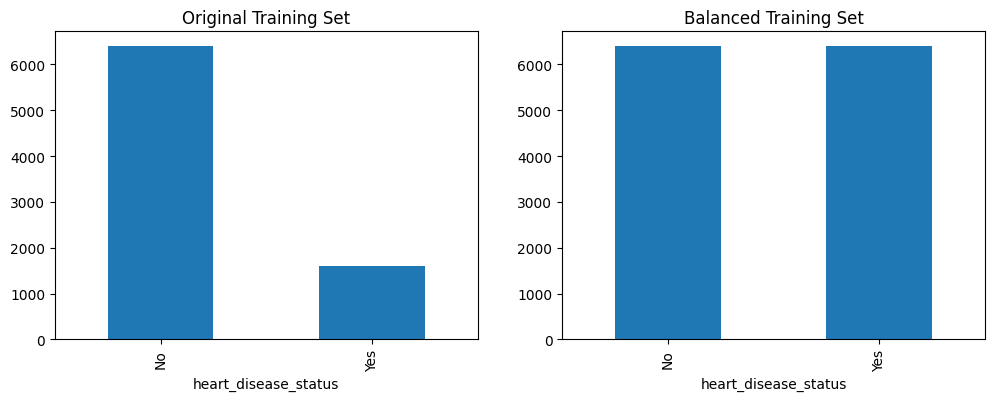

In [152]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original
y_train.value_counts().plot(kind='bar', ax=axes[0], title='Original Training Set')

# Balanced
y_train_balanced.value_counts().plot(kind='bar', ax=axes[1], title='Balanced Training Set')

plt.show()
